In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import math
import statsmodels.api as sm
from statsmodels.tsa import stattools
from scipy.interpolate import spline

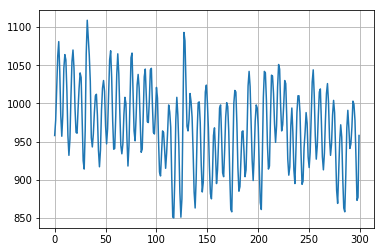

In [3]:
df = pd.read_csv('2_f_1.csv', header=None, names=['value'])
plt.plot(df)
plt.grid()

In [4]:
print(df.head())

   value
0    958
1    978
2   1020
3   1062
4   1081


In [5]:
M = df.value.mean()
print("M =", M)

M = 970.3266666666667


In [6]:
SDNN = df.value.std(ddof=1)
print("SDNN =", SDNN)

SDNN = 52.3483951087049


In [7]:
CV = "%.2f%%" % (SDNN / M * 100)
print("CV =", CV)

CV = 5.39%


In [8]:
Mx = df.value.max()
Mn = df.value.min()
MxDMn = Mx - Mn
print("максимальное значение Mx =", Mx)
print("минимальное значение Mn =", Mn)
print("вариационный размах MxDMn =", MxDMn)

максимальное значение Mx = 1109
минимальное значение Mn = 850
вариационный размах MxDMn = 259


Total n = 300
Amount x(850,900) = 28
Frequency x(850,900) = 0.0933
High x(850,900) = 0.0019
Amount x(900,950) = 75
Frequency x(900,950) = 0.2500
High x(900,950) = 0.0050
Amount x(950,1000) = 106
Frequency x(950,1000) = 0.3533
High x(950,1000) = 0.0071
Amount x(1000,1050) = 73
Frequency x(1000,1050) = 0.2433
High x(1000,1050) = 0.0049
Amount x(1050,1100) = 17
Frequency x(1050,1100) = 0.0567
High x(1050,1100) = 0.0011
Amount x(1100,1150) = 1
Frequency x(1100,1150) = 0.0033
High x(1100,1150) = 0.0001


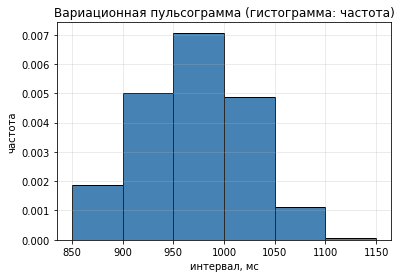

In [9]:
bins = math.ceil((Mx - Mn)/50)
temp = 0
Amount_xi = 0
n = df.value.count()
print("Total n =",n)
Frequency = []
High = []

for i in range(math.ceil(Mn/50)*50,math.ceil(Mx/50)*50,50):
    temp += Amount_xi
    Amount_xi = df.value[df.value < i+50].count() - temp
    print("Amount x(%d,%d) = %d"%(i,i+50,Amount_xi))
    Frequency_xi = round(Amount_xi/n,4)
    print("Frequency x(%d,%d) = %.4f"%(i,i+50,Frequency_xi))
    Frequency.append(Frequency_xi)
    High_xi = Frequency_xi/50
    High.append(High_xi)
    print("High x(%d,%d) = %.4f"%(i,i+50,High_xi))

prob,left,rectangle = plt.hist(x = df.value,
        bins = math.ceil((Mx - Mn)/50),
        rwidth = 50,
        range = (math.floor(Mn/50)*50,math.ceil(Mx/50)*50),
        histtype='bar',
        color = 'steelblue',
        edgecolor = 'black',
        density = True)
plt.ylabel('частота')
plt.xlabel('интервал, мс')
plt.xticks(range(Mn,Mx+50,50))
plt.grid(alpha=0.3)
plt.title('Вариационная пульсограмма (гистограмма: частота)')
plt.show()

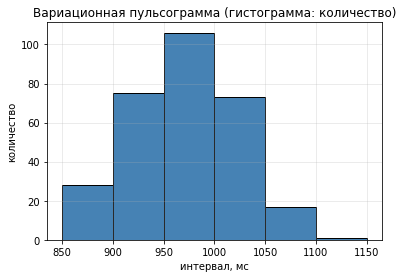

In [10]:
plt.close()
prob,left,rectangle = plt.hist(x = df.value,
        bins = math.ceil((Mx - Mn)/50),
        rwidth = 50,
        range = (math.floor(Mn/50)*50,math.ceil(Mx/50)*50),
        histtype='bar',
        color = 'steelblue',
        edgecolor = 'black')
plt.ylabel('количество')
plt.xlabel('интервал, мс')
plt.xticks(range(Mn,Mx+50,50))
plt.grid(alpha=0.3)
plt.title('Вариационная пульсограмма (гистограмма: количество)')
plt.show()

In [11]:
Mo = 950+50/2
AMo = round((df.value[df.value<1000].count()-df.value[df.value<950].count())/n*100,2)
print("мода Mo =",Mo)
print("амплитуда моды AMo = %.2f%%" % AMo)

мода Mo = 975.0
амплитуда моды AMo = 35.33%


In [12]:
SI = AMo/(2*Mo/1000*MxDMn/1000)
print("индекс напряжения регуляторных систем SI = %.2f%%" % SI)

индекс напряжения регуляторных систем SI = 69.95%


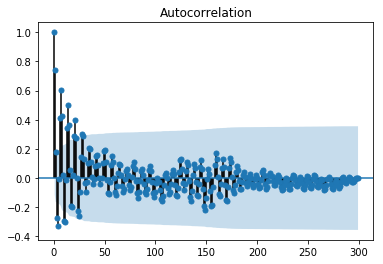

<Figure size 864x432 with 0 Axes>

In [13]:
sm.graphics.tsa.plot_acf(df.value)
plt.figure(figsize = (12,6))
plt.show()

[ 1.00000000e+00  7.40799655e-01  1.79014224e-01 -2.74263634e-01
 -3.30774946e-01 -6.93093642e-03  4.15289283e-01  6.05565971e-01
  4.26477893e-01  2.21497596e-02 -2.97357954e-01 -3.01995752e-01
 -1.08143052e-02  3.43719075e-01  5.01898776e-01  3.64162882e-01
  5.31655776e-02 -1.91715932e-01 -1.98252588e-01  2.21803030e-02
  2.90354953e-01  4.01083835e-01  2.73702769e-01  2.02260325e-03
 -2.24827640e-01 -2.60110888e-01 -9.52360106e-02  1.46361399e-01
  3.03019476e-01  2.86617502e-01  1.32558995e-01 -3.48915566e-02
 -9.82781029e-02 -2.94793640e-02  1.04763943e-01  2.03460791e-01
  2.02697453e-01  1.13119566e-01  5.95421955e-03 -4.30426480e-02
 -6.42595437e-03  8.02185176e-02  1.51087272e-01  1.55155564e-01
  8.90640315e-02  1.57196095e-03 -3.93182647e-02  3.18130272e-03
  1.04541136e-01  1.88578536e-01  1.93361844e-01  1.12444588e-01
 -1.05533333e-02 -1.03721964e-01 -1.08525279e-01 -2.43172845e-02
  9.18001952e-02  1.52602052e-01  1.09928504e-01 -1.53331882e-03
 -9.87713232e-02 -1.16892

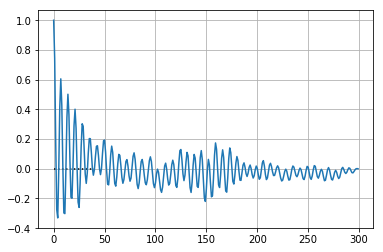

In [14]:
sdracf=stattools.acf(df.value, nlags = 300)
print(sdracf)
plt.plot(sdracf)
plt.grid()
plt.hlines(0,0,41,linestyle = ':')

c:\users\mtx\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


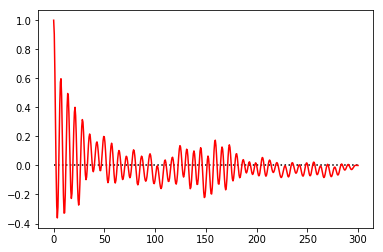

In [15]:
x = [i for i in range(300)]
x_new = np.linspace(0,300,500)
y_smooth = spline(x,sdracf,x_new)
plt.plot(x_new,y_smooth,c='red')
plt.hlines(0,0,300,linestyle = ':')

In [16]:
print(df)

     value
0      958
1      978
2     1020
3     1062
4     1081
5     1042
6      984
7      957
8      985
9     1046
10    1064
11    1057
12    1017
13     958
14     932
15     953
16    1009
17    1055
18    1070
19    1046
20     993
21     962
22     961
23     993
24    1020
25    1040
26    1034
27     982
28     925
29     914
..     ...
270    955
271    932
272    947
273    985
274   1004
275    988
276    937
277    886
278    869
279    909
280    950
281    972
282    956
283    902
284    863
285    858
286    906
287    968
288    991
289    968
290    941
291    947
292    969
293   1003
294    999
295    978
296    929
297    873
298    877
299    958

[300 rows x 1 columns]


In [17]:
diff_prev = -df.diff(1).drop([299])
diff_post = -df.diff(1).drop([0])
#print(diff_prev)
#print(diff_post)

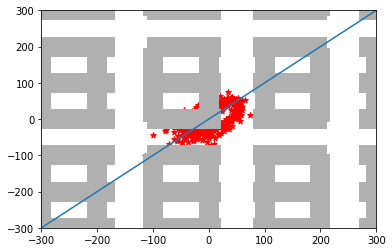

In [19]:
#z = np.array(diff_prev).flatten()
#z = diff_prev.values.flatten()
#print(z)
#z = np.polyfit(diff_prev.values.flatten(),diff_post.values.flatten(),1)
#print(z)
#p1 = np.poly1d(z)
#print(p1)
list1 = [i for i in range(-300,301)]
#yvals=p1(list1)
#ax.plot(list1, yvals)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(diff_prev,diff_post,c = 'r', marker = '*')

ax.plot(list1, list1)
plt.xlim([-300, 300])
plt.ylim([-300,300])
plt.grid(ls = '--')
plt.show()